In [31]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
from Preprocesing import Process_column
import re

In [32]:
# sadness (0), joy (1), love (2), anger (3), fear (4), and surprise (5).

In [33]:
df = pd.read_csv("emotions.csv")
df

,text,label
0,i just feel really helpless and heavy hearted,4
1,ive enjoyed being able to slouch about relax a...,0
2,i gave up my internship with the dmrg and am f...,4
3,i dont know i feel so lost,0
4,i am a kindergarten teacher and i am thoroughl...,4
...,...,...
416804,i feel like telling these horny devils to find...,2
416805,i began to realize that when i was feeling agi...,3
416806,i feel very curious be why previous early dawn...,5
416807,i feel that becuase of the tyranical nature of...,3


In [34]:
df.duplicated().sum()

np.int64(686)

In [35]:
df[df.duplicated()]
df.drop_duplicates()

,text,label
0,i just feel really helpless and heavy hearted,4
1,ive enjoyed being able to slouch about relax a...,0
2,i gave up my internship with the dmrg and am f...,4
3,i dont know i feel so lost,0
4,i am a kindergarten teacher and i am thoroughl...,4
...,...,...
416804,i feel like telling these horny devils to find...,2
416805,i began to realize that when i was feeling agi...,3
416806,i feel very curious be why previous early dawn...,5
416807,i feel that becuase of the tyranical nature of...,3


In [36]:
df.isna().sum()

text     0
label    0
dtype: int64

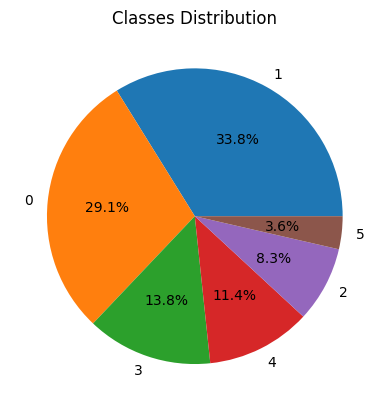

In [37]:
# df["label"].value_counts()

plt.title("Classes Distribution")
plt.pie(df["label"].value_counts(),labels=df["label"].value_counts().keys(),autopct="%1.1f%%")
plt.show()


In [38]:
df["CleanedText"] = df["text"].apply(lambda x: x.lower())
df

,text,label,CleanedText
0,i just feel really helpless and heavy hearted,4,i just feel really helpless and heavy hearted
1,ive enjoyed being able to slouch about relax a...,0,ive enjoyed being able to slouch about relax a...
2,i gave up my internship with the dmrg and am f...,4,i gave up my internship with the dmrg and am f...
3,i dont know i feel so lost,0,i dont know i feel so lost
4,i am a kindergarten teacher and i am thoroughl...,4,i am a kindergarten teacher and i am thoroughl...
...,...,...,...
416804,i feel like telling these horny devils to find...,2,i feel like telling these horny devils to find...
416805,i began to realize that when i was feeling agi...,3,i began to realize that when i was feeling agi...
416806,i feel very curious be why previous early dawn...,5,i feel very curious be why previous early dawn...
416807,i feel that becuase of the tyranical nature of...,3,i feel that becuase of the tyranical nature of...


In [39]:
cleaned = Process_column(Column_name="CleanedText",Dataset=df)

### remove any Single Letters

In [40]:
cleaned.Updeate_column(lambda x: re.sub(r"\b[a-zA-Z]{1}\b",repl="", string=x))
df

,text,label,CleanedText
0,i just feel really helpless and heavy hearted,4,just feel really helpless and heavy hearted
1,ive enjoyed being able to slouch about relax a...,0,ive enjoyed being able to slouch about relax a...
2,i gave up my internship with the dmrg and am f...,4,gave up my internship with the dmrg and am fe...
3,i dont know i feel so lost,0,dont know feel so lost
4,i am a kindergarten teacher and i am thoroughl...,4,am kindergarten teacher and am thoroughly w...
...,...,...,...
416804,i feel like telling these horny devils to find...,2,feel like telling these horny devils to find ...
416805,i began to realize that when i was feeling agi...,3,began to realize that when was feeling agita...
416806,i feel very curious be why previous early dawn...,5,feel very curious be why previous early dawn ...
416807,i feel that becuase of the tyranical nature of...,3,feel that becuase of the tyranical nature of ...


In [41]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

In [42]:
cleaned.Updeate_column(func=lambda x: word_tokenize(x))
df

,text,label,CleanedText
0,i just feel really helpless and heavy hearted,4,"[just, feel, really, helpless, and, heavy, hea..."
1,ive enjoyed being able to slouch about relax a...,0,"[ive, enjoyed, being, able, to, slouch, about,..."
2,i gave up my internship with the dmrg and am f...,4,"[gave, up, my, internship, with, the, dmrg, an..."
3,i dont know i feel so lost,0,"[dont, know, feel, so, lost]"
4,i am a kindergarten teacher and i am thoroughl...,4,"[am, kindergarten, teacher, and, am, thoroughl..."
...,...,...,...
416804,i feel like telling these horny devils to find...,2,"[feel, like, telling, these, horny, devils, to..."
416805,i began to realize that when i was feeling agi...,3,"[began, to, realize, that, when, was, feeling,..."
416806,i feel very curious be why previous early dawn...,5,"[feel, very, curious, be, why, previous, early..."
416807,i feel that becuase of the tyranical nature of...,3,"[feel, that, becuase, of, the, tyranical, natu..."


In [43]:
Stopwords__ = stopwords.words("english")
print(f"Number of Stop Words in English = {len(Stopwords__)}")

Number of Stop Words in English = 198


In [44]:
def Remove_Stopwords(text):
    return [word for word in text if word not in Stopwords__]

In [45]:
cleaned.Updeate_column(Remove_Stopwords)
df

,text,label,CleanedText
0,i just feel really helpless and heavy hearted,4,"[feel, really, helpless, heavy, hearted]"
1,ive enjoyed being able to slouch about relax a...,0,"[ive, enjoyed, able, slouch, relax, unwind, fr..."
2,i gave up my internship with the dmrg and am f...,4,"[gave, internship, dmrg, feeling, distraught]"
3,i dont know i feel so lost,0,"[dont, know, feel, lost]"
4,i am a kindergarten teacher and i am thoroughl...,4,"[kindergarten, teacher, thoroughly, weary, job..."
...,...,...,...
416804,i feel like telling these horny devils to find...,2,"[feel, like, telling, horny, devils, find, sit..."
416805,i began to realize that when i was feeling agi...,3,"[began, realize, feeling, agitated, restless, ..."
416806,i feel very curious be why previous early dawn...,5,"[feel, curious, previous, early, dawn, time, s..."
416807,i feel that becuase of the tyranical nature of...,3,"[feel, becuase, tyranical, nature, government,..."


In [46]:
from nltk.stem import WordNetLemmatizer

Lemmarizer = WordNetLemmatizer()
def Lemmatizong_data(text:list):
    return [Lemmarizer.lemmatize(word=word,pos="v") for word in text]

cleaned.Updeate_column(Lemmatizong_data)
df

,text,label,CleanedText
0,i just feel really helpless and heavy hearted,4,"[feel, really, helpless, heavy, hearted]"
1,ive enjoyed being able to slouch about relax a...,0,"[ive, enjoy, able, slouch, relax, unwind, fran..."
2,i gave up my internship with the dmrg and am f...,4,"[give, internship, dmrg, feel, distraught]"
3,i dont know i feel so lost,0,"[dont, know, feel, lose]"
4,i am a kindergarten teacher and i am thoroughl...,4,"[kindergarten, teacher, thoroughly, weary, job..."
...,...,...,...
416804,i feel like telling these horny devils to find...,2,"[feel, like, tell, horny, devil, find, site, s..."
416805,i began to realize that when i was feeling agi...,3,"[begin, realize, feel, agitate, restless, woul..."
416806,i feel very curious be why previous early dawn...,5,"[feel, curious, previous, early, dawn, time, s..."
416807,i feel that becuase of the tyranical nature of...,3,"[feel, becuase, tyranical, nature, government,..."


In [47]:
def to_string(text:list):
    return " ".join(text)

cleaned.Updeate_column(to_string)
df

,text,label,CleanedText
0,i just feel really helpless and heavy hearted,4,feel really helpless heavy hearted
1,ive enjoyed being able to slouch about relax a...,0,ive enjoy able slouch relax unwind frankly nee...
2,i gave up my internship with the dmrg and am f...,4,give internship dmrg feel distraught
3,i dont know i feel so lost,0,dont know feel lose
4,i am a kindergarten teacher and i am thoroughl...,4,kindergarten teacher thoroughly weary job take...
...,...,...,...
416804,i feel like telling these horny devils to find...,2,feel like tell horny devil find site suit sort...
416805,i began to realize that when i was feeling agi...,3,begin realize feel agitate restless would thin...
416806,i feel very curious be why previous early dawn...,5,feel curious previous early dawn time seek tro...
416807,i feel that becuase of the tyranical nature of...,3,feel becuase tyranical nature government el sa...


In [48]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report
from sklearn.model_selection import train_test_split

In [50]:
X = df["CleanedText"]
Y = df["label"]

In [51]:
x_train,x_text,y_train,y_test = train_test_split(X,Y,test_size=0.3,shuffle=True,random_state=42)

In [52]:
tfidf = TfidfVectorizer()
x_train = tfidf.fit_transform(x_train)
x_test = tfidf.transform(x_text)

In [53]:
print(f"number of Features = {len(tfidf.get_feature_names_out())}")

number of Features = 54151


In [54]:
svc = SVC(random_state=42)
svc

SVC(random_state=42)

In [55]:
svc.fit(x_train,y_train)
y_predicted = svc.predict(x_test)

: 

: 

In [ ]:
import winsound


winsound.MessageBeep()

In [ ]:
svm_acc = accuracy_score(y_true=y_test,y_pred=y_predicted)
print(f"SVM Accurecy score = {svm_acc * 100:.02f}%")